In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-05-27 06:47:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.9MB/s    in 5.6s    

2023-05-27 06:47:41 (18.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


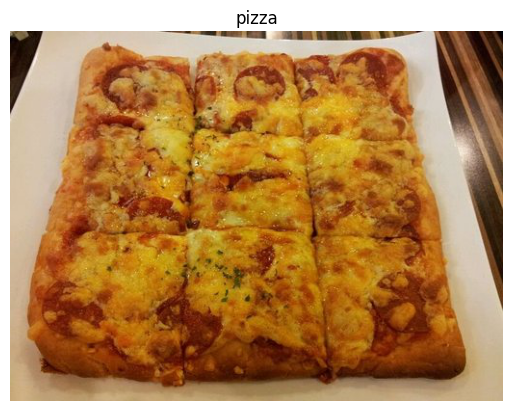

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
img,img.shape

(array([[[223, 221, 209],
         [224, 222, 210],
         [225, 223, 211],
         ...,
         [229, 227, 215],
         [227, 225, 213],
         [222, 220, 208]],
 
        [[223, 221, 209],
         [223, 221, 209],
         [224, 222, 210],
         ...,
         [226, 224, 212],
         [226, 224, 212],
         [224, 222, 210]],
 
        [[223, 221, 209],
         [224, 222, 210],
         [224, 222, 210],
         ...,
         [222, 220, 208],
         [224, 222, 210],
         [223, 221, 209]],
 
        ...,
 
        [[220, 220, 208],
         [219, 219, 207],
         [218, 218, 206],
         ...,
         [221, 219, 207],
         [223, 221, 209],
         [221, 219, 207]],
 
        [[221, 221, 209],
         [220, 220, 208],
         [220, 220, 208],
         ...,
         [223, 221, 209],
         [225, 223, 211],
         [223, 221, 209]],
 
        [[222, 222, 210],
         [222, 222, 210],
         [222, 222, 210],
         ...,
         [221, 219, 207],
  

In [ ]:
img/255.

array([[[0.63137255, 0.56470588, 0.4627451 ],
        [0.59215686, 0.5254902 , 0.42352941],
        [0.57254902, 0.50588235, 0.39607843],
        ...,
        [0.01960784, 0.01176471, 0.01568627],
        [0.        , 0.01960784, 0.04313725],
        [0.        , 0.02352941, 0.05098039]],

       [[0.67058824, 0.60784314, 0.50980392],
        [0.5372549 , 0.4745098 , 0.37254902],
        [0.42352941, 0.35686275, 0.24705882],
        ...,
        [0.01960784, 0.01176471, 0.01568627],
        [0.00784314, 0.01960784, 0.03921569],
        [0.        , 0.02352941, 0.05490196]],

       [[0.54901961, 0.49411765, 0.39215686],
        [0.54117647, 0.48627451, 0.38431373],
        [0.42352941, 0.36078431, 0.25882353],
        ...,
        [0.02745098, 0.01176471, 0.00784314],
        [0.01960784, 0.02352941, 0.03921569],
        [0.00392157, 0.02352941, 0.04705882]],

       ...,

       [[0.77254902, 0.65098039, 0.46666667],
        [0.78039216, 0.65882353, 0.4745098 ],
        [0.78431373, 0

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,batch_size = 32,target_size = (224,224),class_mode = "binary")
test_data = test_datagen.flow_from_directory(test_dir,batch_size = 32,target_size = (224,224),class_mode = "binary")

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,kernel_size = 3,activation = 'relu',input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding = 'valid'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_1.compile(loss = 'binary_crossentropy',optimizer = tf.keras.optimizers.Adam(),metrics = ['accuracy'])
history_1 = model_1.fit(train_data,epochs = 5,steps_per_epoch = len(train_data),validation_data = test_data,validation_steps = len(test_data))
#steps_per_epoch is len(train_Data) bcz len(train_data)*32 = total images we tell per epoch we have len(td) steps/batches to train..

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 29s 281ms/step - loss: 0.5782 - accuracy: 0.7067 - val_loss: 0.4415 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4601 - accuracy: 0.7953 - val_loss: 0.3646 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3961 - accuracy: 0.8267 - val_loss: 0.3422 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3519 - accuracy: 0.8567 - val_loss: 0.3168 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3315 - accuracy: 0.8587 - val_loss: 0.4686 - val_accuracy: 0.7840


In [ ]:
#normal
#Found 1500 images belonging to 2 classes. Found 500 images belonging to 2 classes.
#Epoch 1/10
#47/47 [==============================] - 149s 3s/step - loss: 0.6399 - accuracy: 0.6273 - val_loss: 0.4533 - val_accuracy: 0.8060

#GPU
#Found 1500 images belonging to 2 classes.Found 500 images belonging to 2 classes.
#Epoch 1/10
#47/47 [==============================] - 23s 254ms/step - loss: 0.6822 - accuracy: 0.6193 - val_loss: 0.5236 - val_accuracy: 0.8120

#TPU


In [ ]:
#refer to cnn explainer

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
#papers with code   refer to it for latest in ML/AI

In [ ]:
import pandas as pd
df = pd.DataFrame(history_1.history)
df


,loss,accuracy,val_loss,val_accuracy
0,0.578207,0.706667,0.441528,0.812
1,0.460054,0.795333,0.364616,0.828
2,0.396147,0.826667,0.342217,0.864
3,0.351859,0.856667,0.316797,0.864
4,0.331503,0.858667,0.468574,0.784


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def metrics_plot(his):
  loss = his.history['loss']
  val_loss = his.history['val_loss']
  acc = his.history['accuracy']
  val_acc = his.history['val_accuracy']
  epo = np.arange(len(his.history['loss']))
  plt.plot(epo,loss)
  plt.plot(epo,val_loss)
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.title("loss curve")
  plt.legend()
  plt.figure()
  plt.plot(epo,acc)
  plt.plot(epo,val_acc)
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.title("accuracy curve")
  plt.legend()



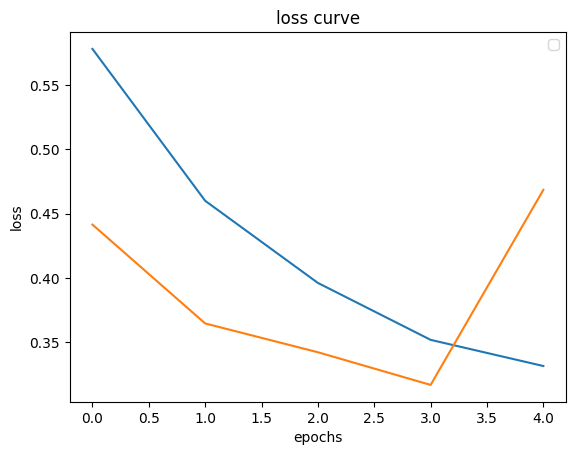

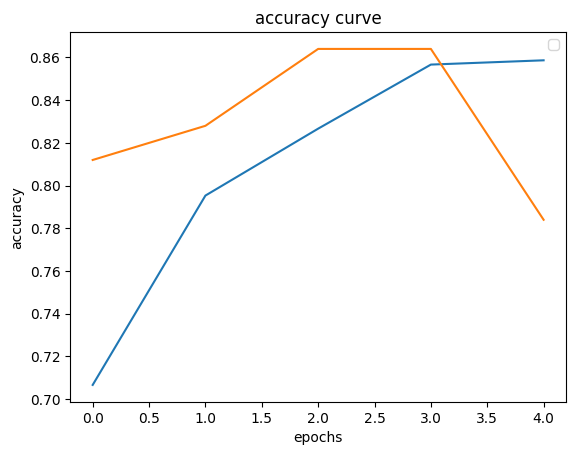

In [ ]:
metrics_plot(history_1)

In [ ]:
import tensorflow as tf
train_data_augumented = ImageDataGenerator(rescale = 1/255.,rotation_range=0.2,width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)

In [ ]:
train_data = train_data_augumented.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=32, shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir,batch_size = 32,target_size = (224,224),class_mode = "binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,kernel_size = 3,activation = 'relu',input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding = 'valid'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_2.compile(loss = 'binary_crossentropy',optimizer = tf.keras.optimizers.Adam(),metrics = ['accuracy'])
history_2 = model_2.fit(train_data,epochs = 5,steps_per_epoch = len(train_data),validation_data = test_data,validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 39s 601ms/step - loss: 0.6595 - accuracy: 0.6067 - val_loss: 0.5169 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 26s 557ms/step - loss: 0.6100 - accuracy: 0.6720 - val_loss: 0.4580 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 24s 511ms/step - loss: 0.5413 - accuracy: 0.7420 - val_loss: 0.4219 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 24s 512ms/step - loss: 0.5342 - accuracy: 0.7553 - val_loss: 0.4799 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 24s 513ms/step - loss: 0.5279 - accuracy: 0.7533 - val_loss: 0.4354 - val_accuracy: 0.8060


In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 2s 141ms/step - loss: 0.4354 - accuracy: 0.8060


[0.43538370728492737, 0.8059999942779541]

In [ ]:
class_names = ['pizza','steak']

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [ ]:
img_pizza = load_and_prep_image("personalpanpzza.jpg")
img_pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.02515725, 0.02515725, 0.02515725],
        [0.02097433, 0.02097433, 0.02097433],
        [0.01822322, 0.01822322, 0.01822322],
        ...,
        [0.01614159, 0.01614159, 0.01614159],
        [0.01621148, 0.01621148, 0.01621148],
        [0.02083436, 0.02083436, 0.02083436]],

       [[0.01169468, 0.01169468, 0.01169468],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00166791, 0.00166791, 0.00166791],
        [0.00300841, 0.00300841, 0.00300841],
        [0.00854444, 0.00854444, 0.00854444]],

       [[0.01398809, 0.01398809, 0.01398809],
        [0.00936625, 0.00936625, 0.00936625],
        [0.00780031, 0.00780031, 0.00780031],
        ...,
        [0.00235571, 0.00235571, 0.00235571],
        [0.00329602, 0.00329602, 0.00329602],
        [0.00854444, 0.00854444, 0.00854444]],

       ...,

       [[0.04433061, 0.04433061, 0.03802809],
        [0.04

In [ ]:
res = model_2.predict(tf.expand_dims(img_pizza,axis=0))

1/1 [==============================] - 0s 27ms/step


In [ ]:
res.shape

(1, 1)

In [ ]:
import numpy as np
item= class_names[tf.cast(tf.squeeze(tf.round(res)),dtype = tf.int32)]
item

'pizza'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 48ms/step


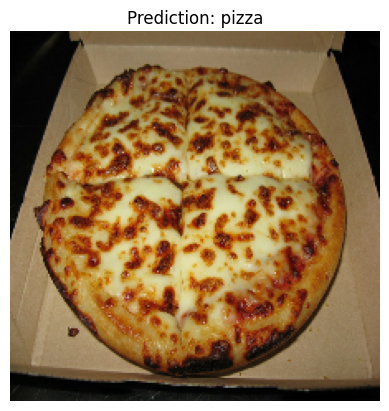

In [ ]:
pred_and_plot(model_2, "personalpanpzza.jpg", class_names)


In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-05-28 07:19:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 172.253.117.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  82.8MB/s    in 4.5s    

2023-05-28 07:19:21 (111 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


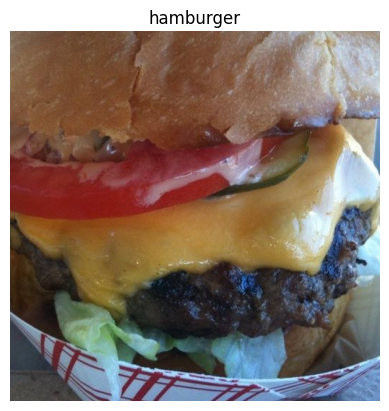

In [ ]:
import os
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,target_size=(224, 224), class_mode='categorical', batch_size=32)
test_data = train_datagen.flow_from_directory(test_dir,target_size=(224, 224), class_mode='categorical', batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
model_4 = Sequential([
    Conv2D(10,3,activation = 'relu',input_shape = (224,224,3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation = "softmax")
])

model_4.compile(loss = 'categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(),metrics = ['accuracy'])


In [ ]:
history_4 = model_4.fit(train_data,epochs = 5,validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 70s 250ms/step - loss: 2.1550 - accuracy: 0.1952 - val_loss: 2.0339 - val_accuracy: 0.2544
Epoch 2/5
235/235 [==============================] - 53s 226ms/step - loss: 1.9110 - accuracy: 0.3297 - val_loss: 1.9198 - val_accuracy: 0.3212
Epoch 3/5
235/235 [==============================] - 62s 264ms/step - loss: 1.5996 - accuracy: 0.4684 - val_loss: 2.0658 - val_accuracy: 0.3256
Epoch 4/5
235/235 [==============================] - 74s 316ms/step - loss: 1.0766 - accuracy: 0.6491 - val_loss: 2.1145 - val_accuracy: 0.3388
Epoch 5/5
235/235 [==============================] - 69s 293ms/step - loss: 0.5263 - accuracy: 0.8333 - val_loss: 3.0446 - val_accuracy: 0.3016


In [ ]:
model_4.evaluate(test_data)

79/79 [==============================] - 12s 154ms/step - loss: 3.0446 - accuracy: 0.3016


[3.044574022293091, 0.30160000920295715]

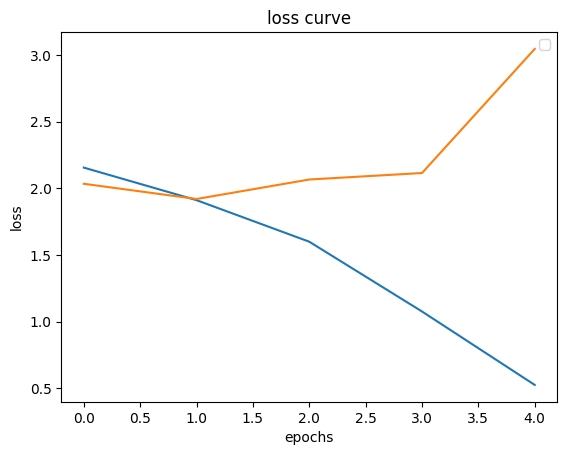

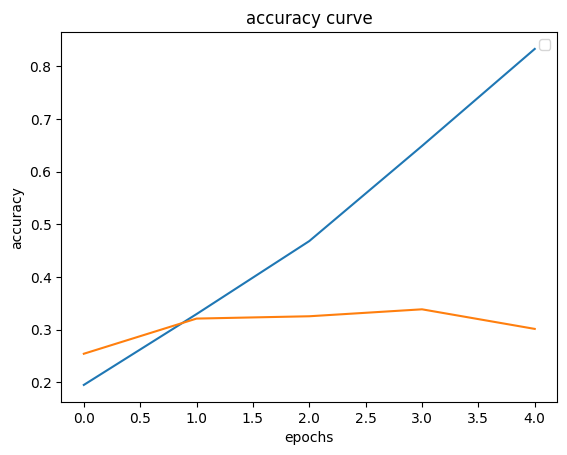

In [ ]:
metrics_plot(history_4)

In [ ]:
train_datagen_aug = ImageDataGenerator(rescale= 1/255.,rotation_range = 20,height_shift_range =0.2,width_shift_range = 0.2,horizontal_flip = True,zoom_range = 0.2 )
train_data = train_datagen_aug.flow_from_directory(train_dir, target_size=(224, 224), class_mode='categorical', batch_size=32, shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir,batch_size = 32,target_size = (224,224),class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
model_5 = tf.keras.models.clone_model(model_4)

model_5.compile(loss = 'categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(),metrics = ['accuracy'])



In [ ]:
history_5 = model_5.fit(train_data,epochs = 5,validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 134s 563ms/step - loss: 2.1771 - accuracy: 0.2013 - val_loss: 2.0325 - val_accuracy: 0.2788
Epoch 2/5
235/235 [==============================] - 149s 633ms/step - loss: 2.0493 - accuracy: 0.2708 - val_loss: 1.8962 - val_accuracy: 0.3340
Epoch 3/5
235/235 [==============================] - 144s 616ms/step - loss: 1.9963 - accuracy: 0.2911 - val_loss: 1.8222 - val_accuracy: 0.3628
Epoch 4/5
235/235 [==============================] - 135s 573ms/step - loss: 1.9336 - accuracy: 0.3311 - val_loss: 1.8238 - val_accuracy: 0.3680
Epoch 5/5
235/235 [==============================] - 134s 569ms/step - loss: 1.9001 - accuracy: 0.3455 - val_loss: 1.7569 - val_accuracy: 0.3972


In [ ]:
model_5.evaluate(test_data)

79/79 [==============================] - 13s 158ms/step - loss: 1.7569 - accuracy: 0.3972


[1.7568562030792236, 0.39719998836517334]

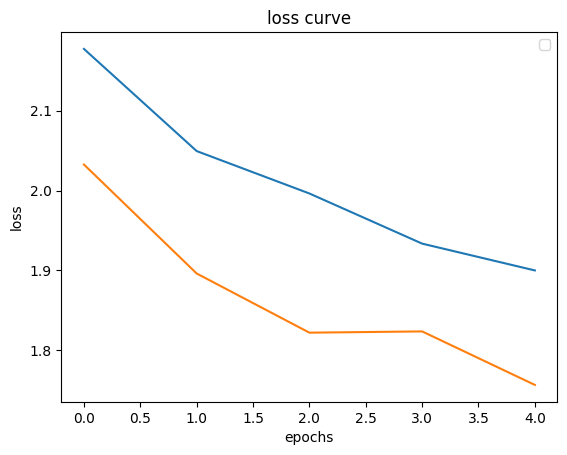

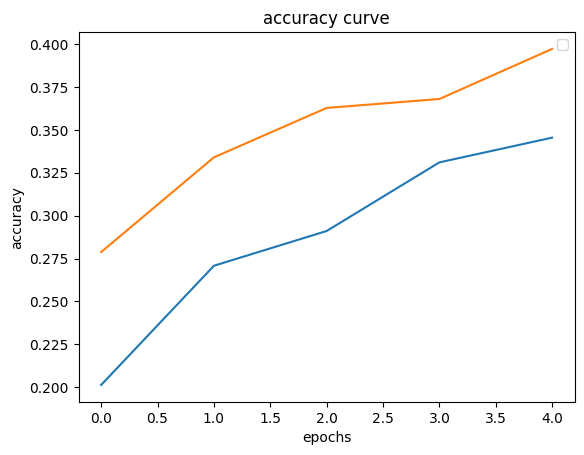

In [ ]:
metrics_plot(history_5)

1/1 [==============================] - 0s 21ms/step


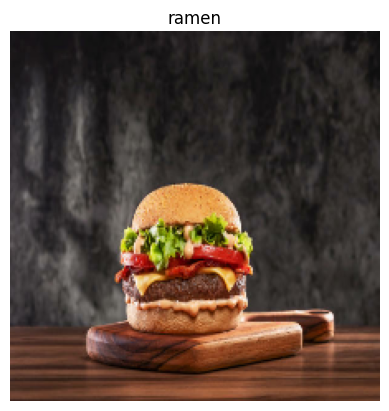

In [ ]:
img = load_and_prep_image("hbcb.jpg")

# Make a prediction
pred = model_5.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [ ]:
pred = model_5.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 24ms/step


array([[0.03938343, 0.05335456, 0.07265871, 0.05662255, 0.07656541,
        0.13066423, 0.11425277, 0.22540972, 0.09594827, 0.1351403 ]],
      dtype=float32)

In [ ]:
class_names[pred.argmax()]

'ramen'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 30ms/step


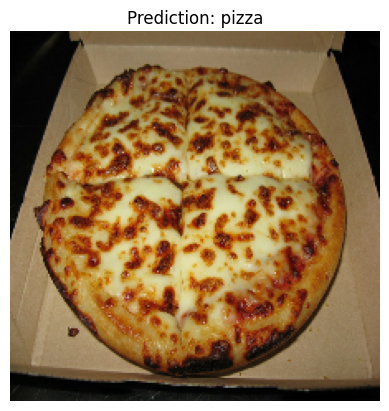

In [ ]:
pred_and_plot(model_5, "personalpanpzza.jpg", class_names)

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
model_5.save("saved_trained_multiclass_model")

In [ ]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_multiclass_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 14s 169ms/step - loss: 1.7569 - accuracy: 0.3972


[1.7568556070327759, 0.39719998836517334]